In [31]:
#We have a set of data of customers which provides information on Gender,Age, Annual Income and Spending Score
#We need to group these customers based on  Annual Income and Spending Score
# We will create clusters and assign these customers to these cluster
# We will also find centriod of these cluster and will present it visually

In [1]:
#Importing important packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## Reading the dataset

dataset=pd.read_csv('D:\\Hackathon\\Customer_Seg\\Customers.csv')

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


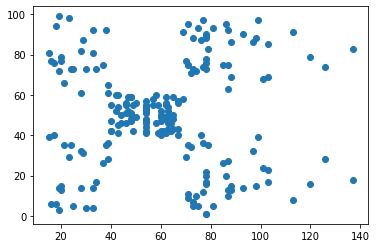

In [6]:
##plotting scatter plot to check relationship between Anual Income and Spending Score

plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

In [7]:
## Scaling data for Annual Income and Spending Score

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataset[['Annual Income (k$)']])
dataset['Annual Income (k$)'] = scaler.transform(dataset[['Annual Income (k$)']])

In [8]:
scaler.fit(dataset[['Spending Score (1-100)']])
dataset['Spending Score (1-100)'] = scaler.transform(dataset[['Spending Score (1-100)']])

In [9]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [10]:
## uisng 3rd and 4th feature only and converting them into numpy array

x = dataset.iloc[:,[3,4]].values

In [11]:
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

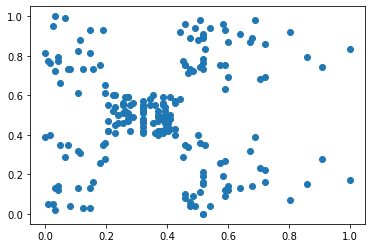

In [12]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

In [13]:
## Using Elbow Method

from sklearn.cluster import KMeans

# Within Cluster Sum of Squares = wcss
wcss=[]
for i in range(1,25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

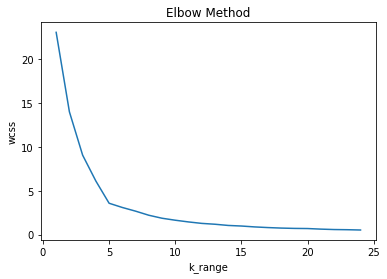

In [14]:
#Checking graphically K-range and wcss
k_range = range(1,25)
plt.plot(k_range,wcss)
plt.title('Elbow Method')
plt.xlabel('k_range')
plt.ylabel('wcss')
plt.show()

In [15]:
#Using n_clusters=5 as observed from elbow method
k_mean = KMeans(n_clusters=5)
k_mean

KMeans(n_clusters=5)

In [16]:
#predicting cluster for each records
Label_or_predicted = k_mean.fit_predict(x)

C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hussa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
Label_or_predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [18]:
#adding new column of cluster
dataset['cluster'] = Label_or_predicted

In [19]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,2
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,2
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,2
5,6,Female,22,0.016393,0.765306,4
6,7,Female,35,0.024590,0.051020,2
7,8,Female,23,0.024590,0.948980,4
8,9,Male,64,0.032787,0.020408,2
9,10,Female,30,0.032787,0.724490,4


In [20]:
#Changing values of 0,1,2,3,4 to d_1,d_2,d_3,d_4 & d_5 in the cluster column
d_1 = dataset[dataset.cluster==0]
d_2 = dataset[dataset.cluster==1]
d_3 = dataset[dataset.cluster==2]
d_4 = dataset[dataset.cluster==3]
d_5 = dataset[dataset.cluster==4]

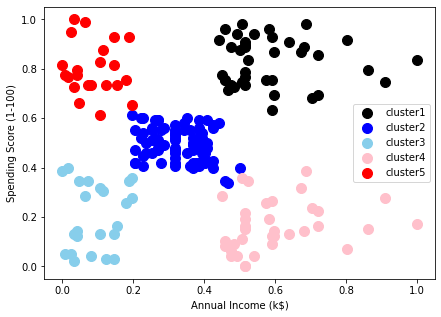

In [21]:
#graphically showing different clusters
plt.figure(figsize=(7,5))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'],c='black',s=100,label='cluster1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'],c='blue',s=100,label='cluster2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'],c='skyblue',s=100,label='cluster3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'],c='pink',s=100,label='cluster4')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'],c='red',s=100,label='cluster5')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [22]:
#finding cluster centres for each cluster
k_mean.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894]])

In [23]:
k_mean.cluster_centers_[0][1]

0.8278388278388277

In [24]:
print(f"Co-ordinates of Cluseter i :     x           y \n")
for i in range(len(k_mean.cluster_centers_)):
    print(f"Co-ordinates of Cluseter {i} : {k_mean.cluster_centers_[i]} ")
 

Co-ordinates of Cluseter i :     x           y 

Co-ordinates of Cluseter 0 : [0.58638083 0.82783883] 
Co-ordinates of Cluseter 1 : [0.33029751 0.49508692] 
Co-ordinates of Cluseter 2 : [0.09265859 0.20319432] 
Co-ordinates of Cluseter 3 : [0.6        0.16443149] 
Co-ordinates of Cluseter 4 : [0.08792846 0.79962894] 


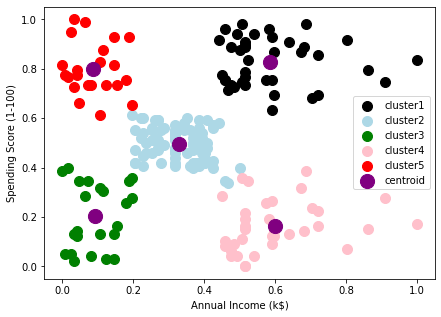

In [25]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'],c='black',s=100,label='cluster1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'],c='lightblue',s=100,label='cluster2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'],c='green',s=100,label='cluster3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'],c='pink',s=100,label='cluster4')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'],c='red',s=100,label='cluster5')

plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],c='purple',s=200,label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()